<a href="https://colab.research.google.com/github/flkhudennd/belajar-golang/blob/master/tesPCA_PakAjun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import RMSprop
from google.colab.patches import cv2_imshow

In [ ]:
#Jalur dataset
path_batik_train = "/content/drive/MyDrive/PCA_ICA/labeled/train"
path_batik_test = "/content/drive/MyDrive/PCA_ICA/labeled/test"

In [ ]:
train_features = []
train_labels = []

# Memuat data train
for file_name in os.listdir(path_batik_train):
    if file_name.endswith(('.jpg')):
        image_path = os.path.join(path_batik_train, file_name)
        image = cv2.imread(image_path)
        image_vector = image.flatten()
        train_features.append(image_vector)
        label = int(file_name.split(" ")[0])
        train_labels.append(label)

batik_train_features = np.array(train_features)

print('Traning data shape:', batik_train_features.shape)

Traning data shape: (1050, 49152)


In [ ]:
test_features = []
test_labels = []

# Memuat data test
for file_name in os.listdir(path_batik_test):
    if file_name.endswith(('.jpg')):
        image_path = os.path.join(path_batik_test, file_name)
        image = cv2.imread(image_path)
        image_vector = image.flatten()
        test_features.append(image_vector)
        label = int(file_name.split(" ")[0])
        test_labels.append(label)

batik_test_features = np.array(test_features)

print('Traning data shape:', batik_test_features.shape)

Traning data shape: (300, 49152)


In [ ]:
X_train = batik_train_features # data fitur untuk pelatihan
X_test = batik_test_features # data fitur untuk pengujian
y_train = train_labels # label untuk data latih
y_test = test_labels # label untuk data uji

In [ ]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  15
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [ ]:
%matplotlib inline

label_dict = {
 0: 'batik bali',
 1: 'batik betawi',
 2: 'batik cendrawasih',
 3: 'batik dayak',
 4: 'batik geblek renteng',
 5: 'batik ikat celup',
 6: 'batik insang',
 7: 'batik kawung',
 8: 'batik lasem',
 9: 'batik megamendung',
 10: 'batik pala',
 11: 'batik parang',
 12: 'batik poleng',
 13: 'batik sekar jagad',
 14: 'batik sekar jagad',
}

In [ ]:
print("Label train:", y_train[0])
print("Label test:", y_test[0])

Label train: 0
Label test: 0


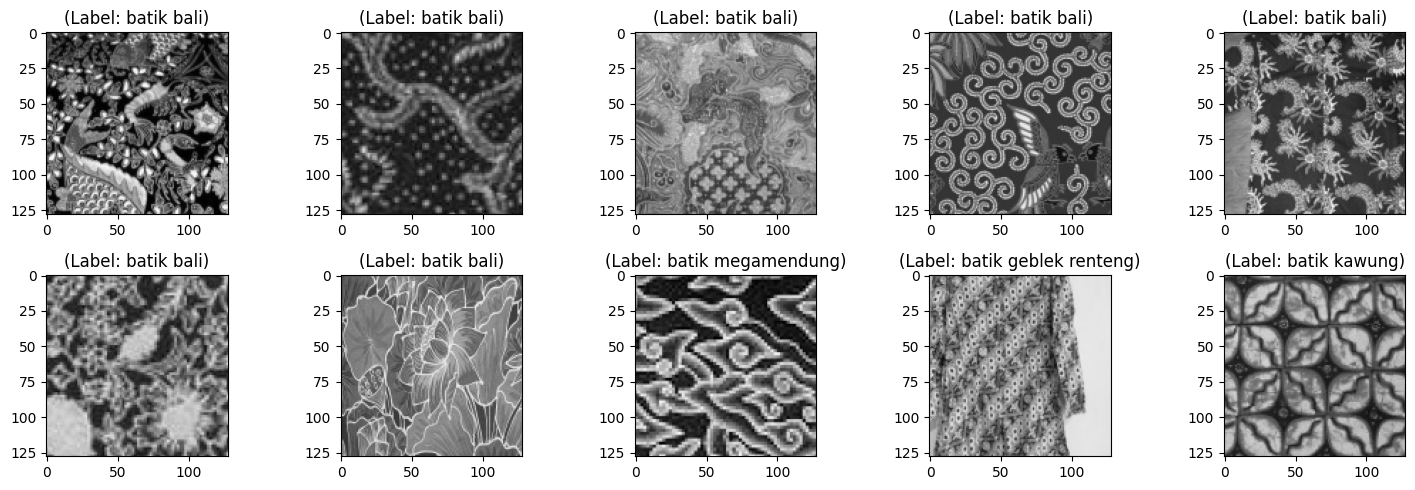

In [ ]:
plt.figure(figsize=[15, 5])

# Menampilkan beberapa gambar dari data pelatihan
for i in range(5):
    plt.subplot(2, 5, i + 1)
    curr_img_train = np.reshape(X_train[i], (128, 128, 3))
    plt.imshow(curr_img_train)
    plt.title("(Label: " + str(label_dict[y_train[i]]) + ")")

# Menampilkan beberapa gambar dari data pengujian
for i in range(5):
    plt.subplot(2, 5, i + 6)
    curr_img_test = np.reshape(X_test[i], (128, 128, 3))
    plt.imshow(curr_img_test)
    plt.title("(Label: " + str(label_dict[y_test[i]]) + ")")

plt.tight_layout()
plt.show()

In [ ]:
#Standarisasi
scaler = StandardScaler()
batiks_scaled = scaler.fit_transform(batik_train_features)

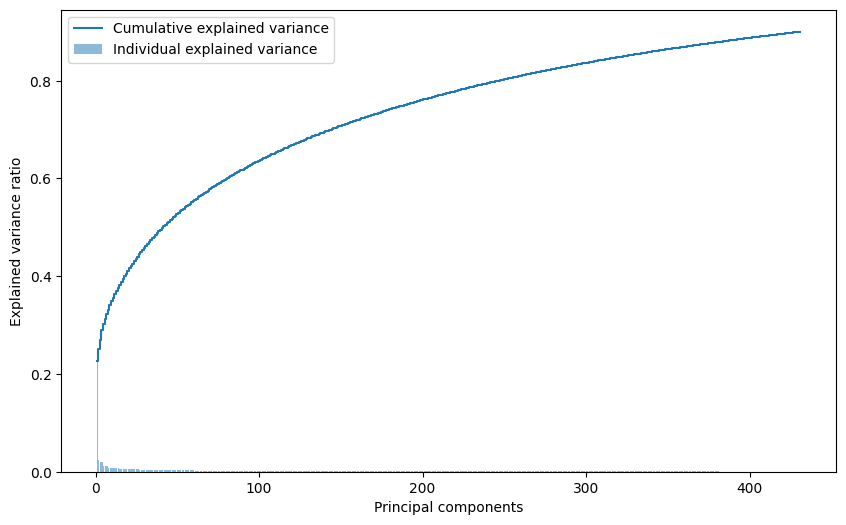

Jumlah komponen menjelaskan 90% varians: 431


In [ ]:
# Menghitung PCA
pca = PCA(n_components=0.9)
batiks_pca = pca.fit_transform(batiks_scaled)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cum_var_exp)+1), var_exp, alpha=0.5, align="center", label="Individual explained variance")
plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where="mid", label="Cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc="best")
plt.show()

print("Jumlah komponen menjelaskan 90% varians:", pca.n_components_)